 # Проект Рынок заведений общественного питания Москвы

**Описание данных**

Таблица rest_data:

id — идентификатор объекта;

object_name — название объекта общественного питания;

chain — сетевой ресторан;

object_type — тип объекта общественного питания;

address — адрес;

number — количество посадочных мест.

## Загрузка данных и подготовка данных к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from plotly import graph_objects as go
import warnings 
warnings.filterwarnings('ignore')
import re

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    rest_data = pd.read_csv('/datasets/rest_data.csv')
except:
    rest_data = pd.read_csv('rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


**Оценим качество предоставленных данных**

In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
rest_data.duplicated().sum()

0

In [6]:
rest_data['object_name']= rest_data['object_name'].str.lower()

In [7]:
rest_data['address'] = rest_data['address'].str.lower()

In [8]:
rest_data['object_type'].unique().tolist()

['кафе',
 'столовая',
 'закусочная',
 'предприятие быстрого обслуживания',
 'ресторан',
 'кафетерий',
 'буфет',
 'бар',
 'магазин (отдел кулинарии)']

In [9]:
rest_data['object_type'] = rest_data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
rest_data['object_type'] = rest_data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

Данные выглядят подходящедля анализа,пропусков нет, явные дубликаты отсутствуют, все написание привили к маленьким буквам для единообразия и упрастилу названия двух котегорий для простоты восприятия

In [10]:
print('количество дупликатов без учета id {}'.format(rest_data.set_index('id').duplicated().sum()))

количество дупликатов без учета id 85


In [11]:
rest_data = rest_data.set_index('id')

In [12]:
rest_data.head()

,object_name,chain,object_type,address,number
id,,,,,
151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [13]:
rest_data.duplicated().sum()

85

In [14]:
rest_data = rest_data.drop_duplicates()

In [15]:
rest_data.duplicated().sum()

0

In [16]:
rest_data.head()

,object_name,chain,object_type,address,number
id,,,,,
151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [17]:
rest_data = rest_data.reset_index()
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Без учета id было выявленно 85 дупликатов от которых избавились в дата сете

##  Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [18]:
vid = rest_data.groupby('object_type', as_index=False).agg({'chain': 'count'}) \
    .sort_values(by='chain', ascending=False) \
    .rename(columns={'chain':'number_of_cafe'})
vid

,object_type,number_of_cafe
3,кафе,6071
7,столовая,2584
6,ресторан,2282
8,фаст-фуд,1897
0,бар,855
1,буфет,576
4,кафетерий,395
2,закусочная,348
5,кулинария,273


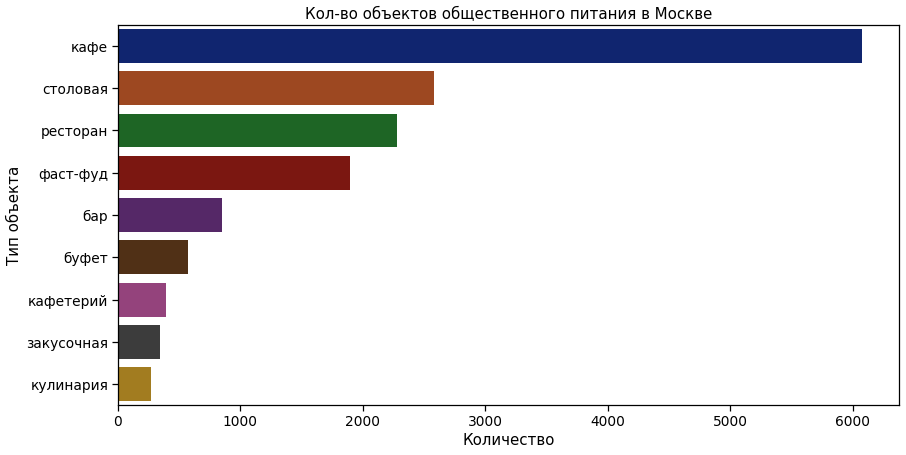

In [19]:
plt.figure(figsize=(14, 7))
sns.set_palette('dark')
sns.set_context("notebook", font_scale=1.25)
sns.barplot(x='number_of_cafe', y='object_type', data=vid) \
.set(title='Кол-во объектов общественного питания в Москве', xlabel='Количество', \
    ylabel='Тип объекта');

**Из представленных данных видно, что самые распространенные типы питания - это Кафе, столовая, ресторан, фаст-фуд**

In [20]:
number =  rest_data.groupby('object_type', as_index=False).agg({'number':'sum'}) \
                                    .sort_values(by='number', ascending=False)
number

,object_type,number
7,столовая,336793
3,кафе,241539
6,ресторан,221091
8,фаст-фуд,39474
0,бар,37221
1,буфет,29621
4,кафетерий,3628
2,закусочная,2731
5,кулинария,1526


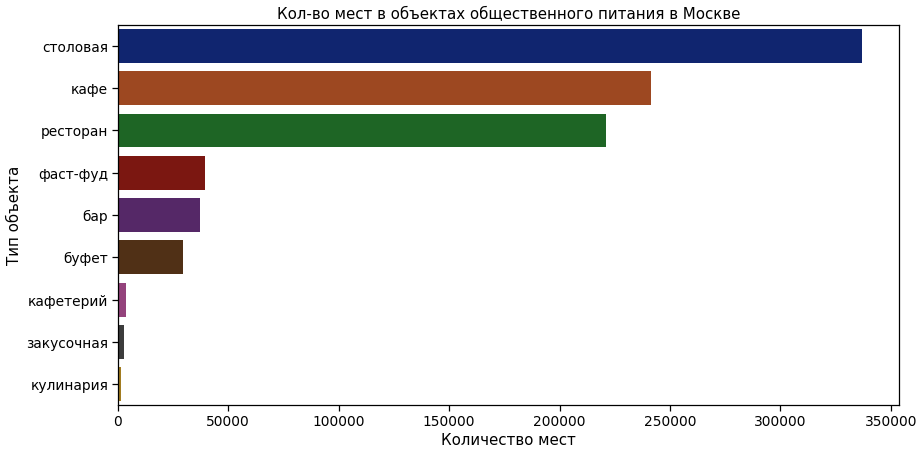

In [21]:
plt.figure(figsize=(14, 7))
sns.set_palette('dark')
sns.set_context("notebook", font_scale=1.25)
sns.barplot(x='number', y='object_type', data=number) \
.set(title='Кол-во мест в объектах общественного питания в Москве', xlabel='Количество мест', \
    ylabel='Тип объекта');

**По суммарному количеству мест выигрывают столовые, кафе и рестораны**

### Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

In [22]:
chain = rest_data.groupby('chain', as_index=False)['object_name'].count().sort_values(by='object_name', ascending=False)
chain['ratio'] = chain['object_name'] / len(rest_data)

chain['chain'] = chain['chain'].str.replace('нет', 'не сетевое')
chain['chain'] = chain['chain'].str.replace('да', 'сетевое')
chain

,chain,object_name,ratio
1,не сетевое,12317,0.81
0,сетевое,2964,0.19


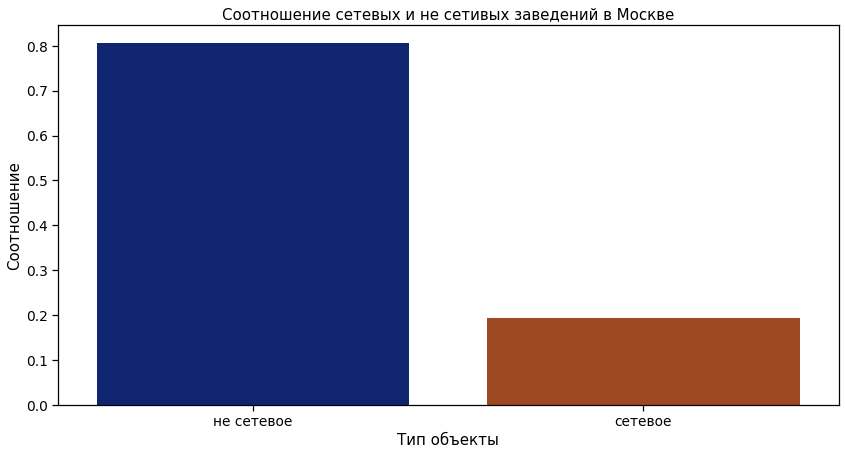

In [23]:
plt.figure(figsize=(14, 7))
sns.set_palette('dark')
sns.set_context("notebook", font_scale=1.25)
sns.barplot(x='chain', y='ratio', data=chain) \
.set(title='Соотношение сетевых и не сетивых заведений в Москве', xlabel='Тип объекты', \
    ylabel='Соотношение');

**По общему числу большую часть рынка занимают не сетевые заведения 12398 организаций и на долю сетей приходится 2968 заведений**

### Выясним для какого вида объекта общественного питания характерно сетевое распространение?

In [24]:
temp = rest_data.query("chain == 'да'").object_type.unique().tolist()
temp

['кафе',
 'фаст-фуд',
 'ресторан',
 'кулинария',
 'кафетерий',
 'закусочная',
 'бар',
 'буфет',
 'столовая']

In [25]:
df1 = rest_data.query("chain == 'да'").groupby('object_type',as_index=False).agg({'id':'count'}) \
                                .sort_values(by='id', ascending=False) \
                                .rename(columns={'id':'count'})
df1['portion'] = df1['count']/rest_data.query("chain == 'да'").shape[0]
df1

,object_type,count,portion
3,кафе,1396,0.47
8,фаст-фуд,788,0.27
6,ресторан,543,0.18
5,кулинария,78,0.03
2,закусочная,56,0.02
4,кафетерий,52,0.02
0,бар,37,0.01
1,буфет,11,0.00
7,столовая,3,0.00


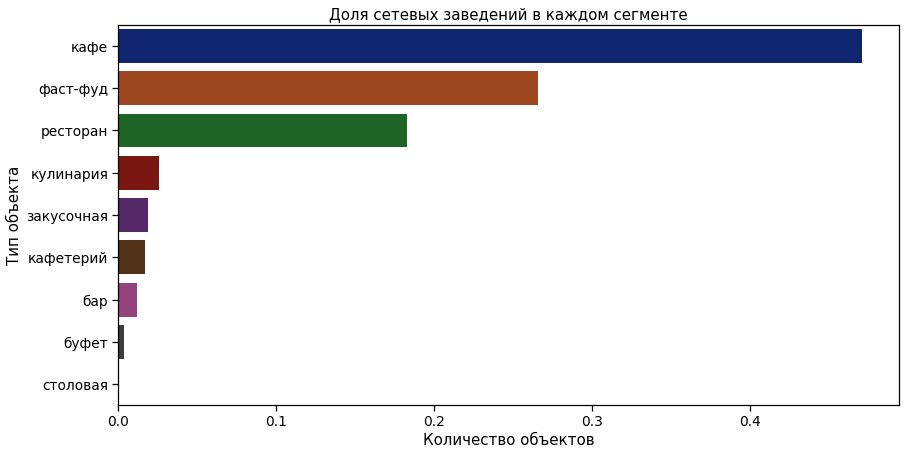

In [26]:
plt.figure(figsize=(14, 7))
sns.set_palette('dark')
sns.set_context("notebook", font_scale=1.25)
sns.barplot(x='portion', y='object_type', data=df1) \
.set(title='Доля сетевых заведений в каждом сегменте', xlabel='Количество объектов', \
    ylabel='Тип объекта');

**Сетевое распростронение характерно в большей степени для кафе, заведений фаст-фуда и ресторанов**

### Узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [27]:
rest_data_chain = rest_data.query("chain == 'да'")

In [28]:
join = rest_data_chain.groupby('object_name', as_index=False).agg({'address': 'count'}) \
    .sort_values(by='address', ascending=False) \
    .rename(columns={'address':'count'}) \
    .merge(rest_data_chain, how='left', on='object_name') \
    .drop(columns=['id','chain', 'object_type', 'address']) \
    .rename(columns={'count':'Количество заведений в сети','number':'количество мест в отдельном заведении сети'})
    
join.head(15)

,object_name,Количество заведений в сети,количество мест в отдельном заведении сети
0,шоколадница,157,40
1,шоколадница,157,48
2,шоколадница,157,25
3,шоколадница,157,50
4,шоколадница,157,50
5,шоколадница,157,48
6,шоколадница,157,60
7,шоколадница,157,35
8,шоколадница,157,68
9,шоколадница,157,50


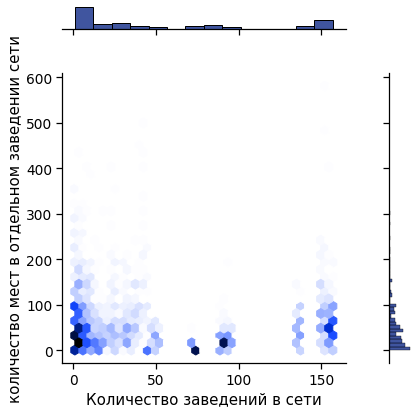

In [29]:
sns.jointplot(x='Количество заведений в сети', y='количество мест в отдельном заведении сети', data=join, kind='hex', space=2);

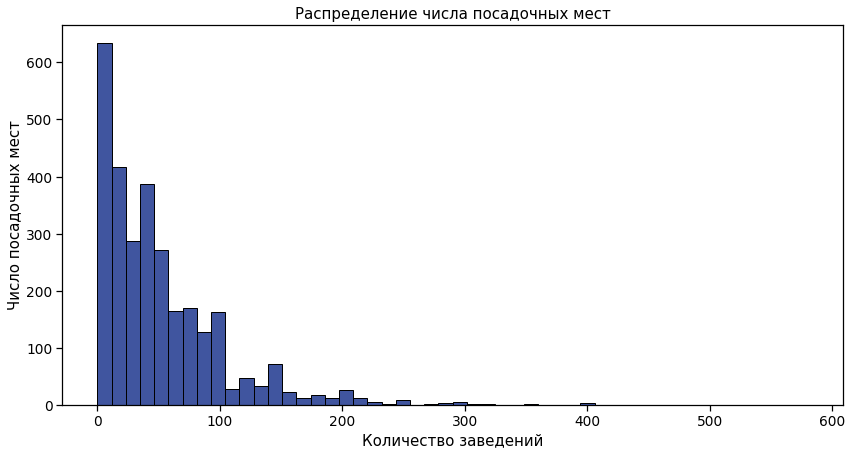

In [30]:
plt.figure(figsize=(14, 7))
sns.set_palette('dark')
sns.histplot(data=rest_data_chain, x='number', bins=50)\
    .set(title='Распределение числа посадочных мест', xlabel='Количество заведений',
         ylabel='Число посадочных мест');

In [31]:
rest_data_chain['number'].describe()

count   2,964.00
mean       52.98
std        57.15
min         0.00
25%        15.00
50%        40.00
75%        72.00
max       580.00
Name: number, dtype: float64

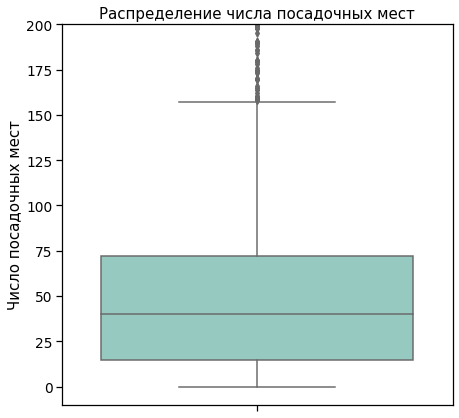

In [32]:
plt.figure(figsize=(7, 7))
sns.set_palette('dark')
ax = sns.boxplot(data=rest_data_chain, y='number', palette="Set3") \
    .set(ylim=(-10,200), title='Распределение числа посадочных мест',
         ylabel='Число посадочных мест');

**Однозначно на вопрос ответить сложно, из проведенного анализа мы можем видеть, что сетивые заведения разделились на две группы, в одных присутствуют объекты с большим числом посадочных мест выше среднего значения в 40 мест и есть сети с большим числом заведений с небольшим количеством мест до 50 - 70 мест**

### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.

In [33]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [74]:
sample = rest_data.groupby('object_type', as_index=False).agg({'number':['median','mean']}) 
                         
sample.columns=['object_type', 'median', 'mean']
sample = sample.sort_values(by='median', ascending=False)
sample

,object_type,median,mean
7,столовая,103,130.34
6,ресторан,80,96.88
0,бар,35,43.53
1,буфет,32,51.43
3,кафе,30,39.79
4,кафетерий,6,9.18
8,фаст-фуд,6,20.81
2,закусочная,0,7.85
5,кулинария,0,5.59


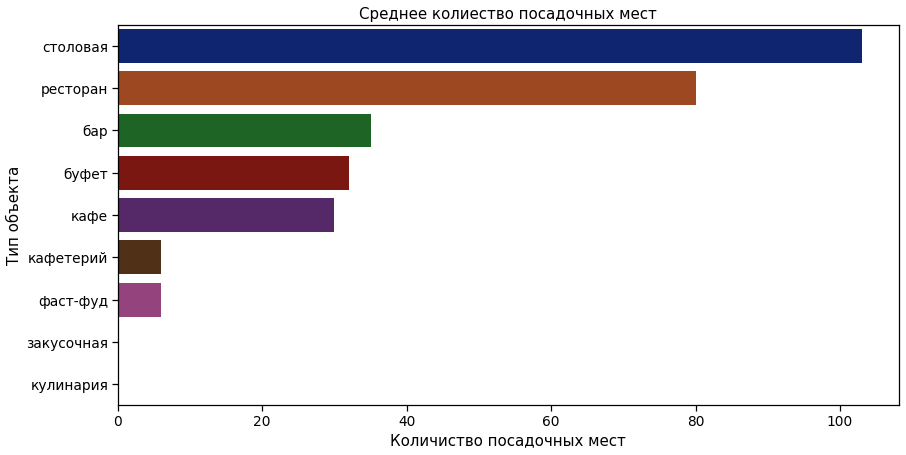

In [81]:
plt.figure(figsize=(14, 7))
sns.set_palette('dark')
sns.set_context("notebook", font_scale=1.25)
ax = sns.barplot(x='median', y='object_type', data=sample) \
.set(title='Среднее колиество посадочных мест', xlabel='Количиство посадочных мест', \
    ylabel='Тип объекта');

### Выделим в отдельный столбец информацию об улице из столбца address 

In [36]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [40]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest_data["street_new"] = rest_data["address"].str.extract(str_pat, flags=re.I)

In [41]:
rest_data.head()

,id,object_name,chain,object_type,address,number,street,street_new
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,абрамцевская улица


In [42]:
rest_address = rest_data.groupby('street_new').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
rest_address

,street_new,id
0,проспект мира,203
1,профсоюзная улица,181
2,ленинградский проспект,170
3,пресненская набережная,167
4,варшавское шоссе,164
...,...,...
1894,егорьевский проезд,1
1895,улица академика опарина,1
1896,улица академика павлова,1
1897,улица академика петровского,1


### Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

Воспользуемся внешней информацией с аналитикой по адрессам общепита с ссайта мэрии Москвы 

In [43]:
sheet_id = "15Ov5Pgyp0Mx_YRos6ysnwxiyNTNXcl4mVurZYbr8UrU"
sheet_name = "data-4275-2022-05-101"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

In [44]:
df.head()

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84
0,151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.71,55.88
1,77874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.67,55.74
2,24309,"Кафе ""Академия""",637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.67,55.74
3,27429,"ГБОУ ""Школа № 1430 имени Героя Социалистическо...",637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.57,55.90
4,148815,Брусника,637376481,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",PublicPhone:(495) 697-04-89\n\n,10,нет,37.60,55.75


In [45]:
df_clear = df.drop(columns=['Name', 'global_id', 'IsNetObject', 'OperatingCompany',
        'TypeObject', 'PublicPhone', 'SeatsCount', 'SocialPrivileges', 'Longitude_WGS84', 'Latitude_WGS84'])


In [46]:
df_clear['address'] = df_clear['Address'].str.lower()

In [47]:
data = rest_data.merge(df_clear, how='left', on='address').drop(columns=['ID', 'Address']) \
    .rename(columns={'AdmArea': 'adm_area', 'District': 'district'})
data.head()

,id,object_name,chain,object_type,address,number,street,street_new,adm_area,district
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,улица егора абакумова,Северо-Восточный административный округ,Ярославский район
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,улица талалихина,Центральный административный округ,Таганский район
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,абельмановская улица,NaN,NaN
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,абрамцевская улица,Северо-Восточный административный округ,район Лианозово
4,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,абрамцевская улица,Северо-Восточный административный округ,район Лианозово


In [48]:
data['district'].isna().sum() / data.shape[0] *100

3.8983724656362564

Получили 4% процента пропущенных значений. Объем пропусков позволяет проводить анализ дальше

In [49]:
top_10 = data.groupby(['street_new', 'district'], as_index=False).agg({'id': 'count'}) \
    .sort_values(by='id', ascending=False) \
    .rename(columns={'id': 'count'}) \
    .head(10)
top_10

,street_new,district,count
1006,пресненская набережная,Пресненский район,7026
1840,ходынский бульвар,Хорошёвский район,4970
1056,проспект мира,район Свиблово,3302
589,кировоградская улица,район Чертаново Центральное,3120
1550,улица ленинская слобода,Даниловский район,2421
793,мытная улица,Даниловский район,1933
976,площадь киевского вокзала,район Дорогомилово,1834
1917,ярцевская улица,район Кунцево,1467
1804,усачёва улица,район Хамовники,1431
674,ленинградское шоссе,Войковский район,1429


In [50]:
top_10['district'].tolist()

['Пресненский район',
 'Хорошёвский район',
 'район Свиблово',
 'район Чертаново Центральное',
 'Даниловский район',
 'Даниловский район',
 'район Дорогомилово',
 'район Кунцево',
 'район Хамовники',
 'Войковский район']

**Получили топ 10 районов с самой большой концентрацией пищевых заведений**

'Пресненский район'

'Хорошёвский район',

'район Свиблово',

'район Чертаново Центральное',

'Даниловский район',

'Даниловский район',

'район Дорогомилово',

'район Кунцево',

'район Хамовники',

'Войковский район'

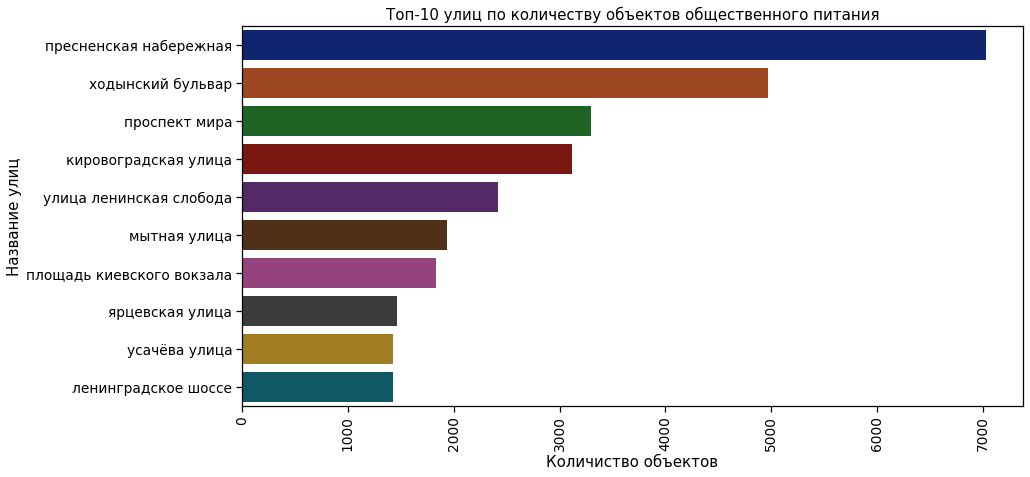

In [51]:
plt.figure(figsize=(14, 7))
sns.set_palette('dark')
sns.set_context("notebook", font_scale=1.25)
sns.barplot(x='count', y='street_new', data=top_10) \
    .set(title='Топ-10 улиц по количеству объектов общественного питания', xlabel='Количиство объектов',
         ylabel='Название улиц')
plt.xticks(rotation=90);

### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [52]:
top_1 = data.groupby(['street_new', 'district'], as_index=False).agg({'id': 'count'}) \
    .sort_values(by='id', ascending=True) \
    .rename(columns={'id': 'count'}) \
    .query('count == 1') \
    .drop_duplicates()

In [53]:
top_1['district'].nunique()

127

In [54]:
top_1['district'].unique().tolist()

['район Аэропорт',
 'поселение Краснопахорское',
 'район Южное Тушино',
 'Таганский район',
 'район Бирюлёво Восточное',
 'район Митино',
 'район Зюзино',
 'Мещанский район',
 'Пресненский район',
 'район Беговой',
 'район Хамовники',
 'район Очаково-Матвеевское',
 'район Сокол',
 'Тверской район',
 'Бабушкинский район',
 'поселение Троицк',
 'район Дорогомилово',
 'район Арбат',
 'район Соколиная Гора',
 'район Марьино',
 'Басманный район',
 'район Крылатское',
 'Нижегородский район',
 'район Строгино',
 'район Южное Бутово',
 'район Новогиреево',
 'Останкинский район',
 'Южнопортовый район',
 'район Кунцево',
 'район Хорошёво-Мнёвники',
 'Лосиноостровский район',
 'район Савёлки',
 'поселение Марушкинское',
 'район Кузьминки',
 'район Внуково',
 'район Марьина Роща',
 'район Отрадное',
 'район Косино-Ухтомский',
 'район Выхино-Жулебино',
 'район Лефортово',
 'район Текстильщики',
 'район Коньково',
 'Бескудниковский район',
 'Красносельский район',
 'район Старое Крюково',
 'Головинс

**Получили список из 127 районов, в которых на отдельных улицах наблюдается низкая плотность объектов общепита**

## Вывод

Отталкиваясь от концепции проекта, не сетевое кафе с ииновационными идеями, которое требует больших инвестиций в технологическое обеспечение и по итогу анализа распределения мест общипита, можно сделать следующие рекомендации:

1. Размещать кафе целесобразней на одной из улиц топ_10. Так как эти улицы хорошо известны в среде людей любящих посищать кафе и новая идея кафе может привлечь большое количество поситителей.
2. Организовать кафе на 40 - 50 посадочных мест, что в целом будем соответствовать средниму числу посадочных мест, так же это не потребует значительных площадей для аренды, которая стоит дорого в центральном округе Москвы.
